In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tweets.csv')

df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [3]:
df.drop('id',
        axis=1
        , inplace=True)

In [4]:
df.shape

(400, 2)

In [5]:
df['author'].value_counts()

author
Donald J. Trump    200
Justin Trudeau     200
Name: count, dtype: int64

In [6]:
df.isna().sum()

author    0
status    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### NLP Data Processing

In [8]:
import string
import re
import nltk

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_data(text):
    c_text = ''.join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+',c_text.lower())
    nstop = [word for word in tokens if word not in stopwords]
    clean_text = [wn.lemmatize(word) for word in nstop]
    return clean_text

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

Count_s = CountVectorizer(analyzer=clean_data)

In [11]:
X = pd.DataFrame(Count_s.fit_transform(df['status']).toarray())

In [12]:
X


,0,1,2,3,4,5,6,7,8,9,...,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder

LabelEn = LabelEncoder()

In [14]:
y = LabelEn.fit_transform(df['author'])

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Applying Machine Learning Models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=29)

In [18]:
NB = GaussianNB().fit(X_train,y_train)
y_pred = NB.predict(X_test)

In [21]:
NB_acc = accuracy_score(y_test,y_pred)

In [20]:
# confusion_matrix(y_test,y_pred)

array([[39,  5],
       [ 3, 33]])

In [22]:
Ada = AdaBoostClassifier(n_estimators=50,random_state=27).fit(X_train,y_train)
y_pred_ada = Ada.predict(X_test)

/home/pias/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
Ada_acc = accuracy_score(y_test,y_pred_ada)
Ada_acc

0.9

In [27]:
Neigh = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred_Ng = Neigh.predict(X_test)

In [28]:
Ng_acc = accuracy_score(y_test,y_pred_Ng)
Ng_acc

0.5875

In [29]:
GDBos = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_gd = GDBos.predict(X_test)

In [31]:
GD_acc = accuracy_score(y_test,y_pred_gd)
GD_acc

0.8875

#### Model Comparison

In [32]:
compare_models = pd.DataFrame(
    {  'Model' : ['K Nearest Neighbors','Naive Bayes','Ada Boosting','Gradient Boosting'],
        'Accuracy Score' : [Ng_acc,NB_acc,Ada_acc,GD_acc]
    })

compare_models

,Model,Accuracy Score
0,K Nearest Neighbors,0.5875
1,Naive Bayes,0.9000
2,Ada Boosting,0.9000
3,Gradient Boosting,0.8875


Text(0.5, 1.0, 'Accuracy of Models')

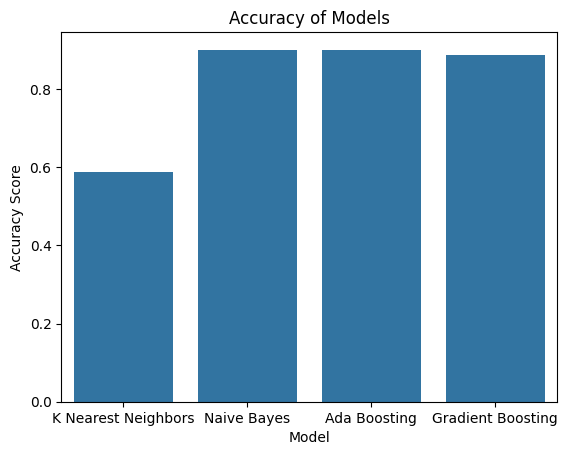

In [37]:
sns.barplot(data=compare_models
            , x='Model'
            , y='Accuracy Score')

plt.title("Accuracy of Models")

In [33]:
confusion_matrix(y_test,y_pred)

array([[39,  5],
       [ 3, 33]])

In [34]:
confusion_matrix(y_test,y_pred_ada)

array([[40,  4],
       [ 4, 32]])